# 폐기물 발생량, 환경오염 방지 실태 설문조사 분석

---

## 목표
- 통계청의 생활폐기물 발생현황과 환경오염 방지 노력 실태 설문조사 데이터를 분석
- 웹 서비스에 필요한 방향성으로 데이터 정제

---

## 1. 데이터 읽기

### 1.1. 필요한 패키지 설치하기

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
!pip install seaborn==0.9.0
import seaborn as sns
print(sns.__version__)

0.9.0


### 1.2. 데이터 불러오기

In [2]:
# 우선 14~18년도의 데이터를 불러온다
df2014 = pd.read_csv('./dataset/가정생활폐기물발생및처리_2014.csv', encoding='utf-8', header=4, names=['시도', '시군구', '발생량및 처리현황', '처리방식', '총계'], usecols=[0, 1, 2, 3, 4])
df2015 = pd.read_csv('./dataset/가정생활폐기물발생및처리_2015.csv', encoding='utf-8', header=4, names=['시도', '시군구', '발생량및 처리현황', '처리방식', '총계'], usecols=[0, 1, 2, 3, 4])
df2016 = pd.read_csv('./dataset/가정생활폐기물발생및처리_2016.csv', encoding='utf-8', header=4, names=['시도', '시군구', '발생량및 처리현황', '처리방식', '총계'], usecols=[0, 1, 2, 3, 4])
df2017 = pd.read_csv('./dataset/가정생활폐기물발생및처리_2017.csv', encoding='utf-8', header=4, names=['시도', '시군구', '발생량및 처리현황', '처리방식', '총계'], usecols=[0, 1, 2, 3, 4])
df2018 = pd.read_csv('./dataset/가정생활폐기물발생및처리_2018.csv', encoding='utf-8', header=4, names=['시도', '시군구', '발생량및 처리현황', '처리방식', '총계'], usecols=[0, 1, 2, 3, 4])

In [3]:
# 19~20년도의 데이터는 기존 데이터들과 형태가 다르기 때문에 따로 불러온다
df2019 = pd.read_csv('./dataset/가정생활폐기물발생및처리_2019.csv', encoding='utf-8', header=2, names=['시도', '배출방식', '성질', '분류', '총계'], usecols=[0, 1, 2, 3, 4])
df2020 = pd.read_csv('./dataset/가정생활폐기물발생및처리_2020.csv', encoding='utf-8', header=2, names=['시도', '배출방식', '성질', '분류', '총계'], usecols=[0, 1, 2, 3, 4])

### 1.3. 데이터 확인하기

In [4]:
df2014.head()

,시도,시군구,발생량및 처리현황,처리방식,총계
0,전국,합계,발생량,발생량,42355.2
1,전국,합계,처리방법,매립,6271.7
2,전국,합계,처리방법,소각,11530.6
3,전국,합계,처리방법,재활용,24552.9
4,서울,종로구,발생량,발생량,290.9


In [5]:
df2019

,시도,배출방식,성질,분류,총계
0,전국,합계,NaN,NaN,16760917.7
1,전국,종량제방식 등 혼합배출,소계,NaN,7654774.3
2,전국,종량제방식 등 혼합배출,가연성,소계,6582204.5
3,전국,종량제방식 등 혼합배출,가연성,폐지류,1777903.9
4,전국,종량제방식 등 혼합배출,가연성,폐합성수지류,1612074.8
...,...,...,...,...,...
751,제주,재활용 가능자원 분리배출,폐전기전자제품,NaN,2644.0
752,제주,재활용 가능자원 분리배출,폐가구류,NaN,0.0
753,제주,재활용 가능자원 분리배출,기타,NaN,16128.2
754,제주,재활용 가능자원 분리배출,재활용 잔재물,NaN,9140.0


## 2.데이터 가공하기

### 2.1. 형식 통일하기

In [6]:
# 연도 컬럼을 추가해준다
df2014['연도'] = '2014'
df2015['연도'] = '2015'
df2016['연도'] = '2016'
df2017['연도'] = '2017'
df2018['연도'] = '2018'

In [7]:
# 14~18년도의 데이터프레임을 하나로 합쳐 저장한다
df1418 = pd.concat([df2014, df2015, df2016, df2017, df2018]).set_index('연도')

In [8]:
# 마찬가지로 연도 컬럼을 추가해준다
df2019['연도'] = '2019'
df2020['연도'] = '2020'

In [9]:
# 연도 컬럼을 index로 하여 데이터프레임을 합친다
df1920 = pd.concat([df2019, df2020]).set_index('연도')

### 2.2. 필요한 데이터로 정제하기

In [10]:
# 조건을 통해서 필요한 데이터만 남도록 정리한다
df1418 = df1418[(df1418['시도'] == '전국') & (df1418['처리방식'] == '발생량')]

In [11]:
# 톤/일 단위에서 톤/년 단위로 바꿔주기 위해 모든 '총계' 컬럼에 365를 곱해준다
df1418['총계'] = df1418['총계'].apply(lambda x: x*365)

In [12]:
# 필요한 데이터만 남겨준다
df1920 = df1920[(df1920['시도'] == '전국') & (df1920['배출방식'] == '합계')]

### 2.3. 데이터프레임 합치기

In [13]:
# 두 데이터프레임을 합쳐준다
df_final = pd.concat([df1920, df1418]).sort_values(['총계'], ascending = True)

In [14]:
# index값을 초기화시켜준다
df_final = df_final.reset_index()

In [15]:
df_final

,연도,시도,배출방식,성질,분류,총계,시군구,발생량및 처리현황,처리방식
0,2014,전국,NaN,NaN,NaN,15459648.0,합계,발생량,발생량
1,2015,전국,NaN,NaN,NaN,15845088.0,합계,발생량,발생량
2,2017,전국,NaN,NaN,NaN,16428248.5,합계,발생량,발생량
3,2016,전국,NaN,NaN,NaN,16593009.5,합계,발생량,발생량
4,2019,전국,합계,NaN,NaN,16760917.7,NaN,NaN,NaN
5,2018,전국,NaN,NaN,NaN,17063494.5,합계,발생량,발생량
6,2020,전국,합계,NaN,NaN,17303386.4,NaN,NaN,NaN


### 2.4. 그래프 확인하기

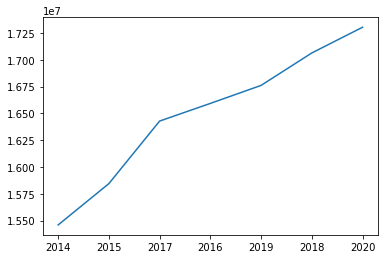

In [16]:
plt.plot(df_final['연도'], df_final['총계'])

---

## 3. 설문조사 데이터 읽기

### 3.1. 데이터 불러오기

In [17]:
prevent_food = pd.read_csv('./dataset/환경오염_방지_노력__음식물_쓰레기_줄이기__13세_이상_인구__20221005112715.csv', encoding='cp949', header=[0,1])
prevent_disposable = pd.read_csv('./dataset/환경오염_방지_노력_일회용품_사용하지_않기__13세_이상_인구__20221005112656.csv', encoding='cp949', header=[0,1])
prevent_own = pd.read_csv('./dataset/환경오염_방지_노력_대중교통_이용하기__13세_이상_인구__20221005112622.csv', encoding='cp949', header=[0,1])
prevent_water = pd.read_csv('./dataset/환경오염_방지_노력_물_절약하기__13세_이상_인구__20221005112548.csv', encoding='cp949', header=[0,1])
prevent_recycle = pd.read_csv('./dataset/환경오염_방지_노력_재활용품_분리_배출하기__13세_이상_인구__20221005112531.csv', encoding='cp949', header=[0,1])
prevent_campaign = pd.read_csv('./dataset/환경오염_방지_노력_자연보호_및_환경보전활동_참여하기__13세_이상_인구__20221005112456.csv', encoding='cp949', header=[0,1])
prevent_power = pd.read_csv('./dataset/환경오염_방지_노력_가정_내_대기전력_줄이기__13세_이상_인구__20221005121200.csv', encoding='cp949', header=[0,1])

### 3.2. 데이터 합치기

In [18]:
# 각 데이터마다 형식이 동일하므로 이를 구분하기 위해 keys를 설정해준다
prevent_pollution = pd.concat([prevent_food, prevent_disposable, prevent_own, prevent_water, prevent_recycle, prevent_campaign, prevent_power], axis = 0, keys = ['음식물 쓰레기', '일회용품', '대중교통', '물', '분리수거', '자연보호활동', '대기전력'])

### 3.3. 데이터 정제하기

In [19]:
# 불필요한 기존 index를 제거해주고, 조건을 통해 필요한 데이터를 뽑아낸다
prevent_pollution = prevent_pollution[prevent_pollution['특성별(1)']['특성별(1)'] == '전체'].droplevel(1)

In [20]:
prevent_pollution.index

Index(['음식물 쓰레기', '일회용품', '대중교통', '물', '분리수거', '자연보호활동', '대기전력'], dtype='object')

In [21]:
prevent_pollution = prevent_pollution.loc[['일회용품', '분리수거']]

In [22]:
# 연도 컬럼을 Series로 사용할 수 있도록 가공해주기 위해 stack을 사용한다. 불필요한 컬럼들은 제거해준다
prevent_pollution = prevent_pollution.drop([prevent_pollution.columns[0], prevent_pollution.columns[1], prevent_pollution.columns[2]], axis=1).stack(level=0).reset_index(level=1)

In [23]:
# 연도의 컬럼명을 지정해준다
prevent_pollution.rename(columns = {'level_1':'연도'}, inplace=True)

In [24]:
# 수치 데이터를 전부 실수로 바꾸어준다
prevent_pollution['매우 노력함'] = prevent_pollution['매우 노력함'].apply(lambda x: float(x))
prevent_pollution['별로 노력하지 않음'] = prevent_pollution['별로 노력하지 않음'].apply(lambda x: float(x))
prevent_pollution['약간 노력함'] = prevent_pollution['약간 노력함'].apply(lambda x: float(x))
prevent_pollution['전혀 노력하지 않음'] = prevent_pollution['전혀 노력하지 않음'].apply(lambda x: float(x))

In [25]:
prevent_pollution['긍정'] = prevent_pollution['매우 노력함'] + prevent_pollution['약간 노력함']
prevent_pollution['부정'] = prevent_pollution['별로 노력하지 않음'] + prevent_pollution['전혀 노력하지 않음']

In [26]:
# 긍정적 통계만을 남긴 새 데이터프레임을 만든다
prevent_pollution_percentage = prevent_pollution.groupby('연도').aggregate({'긍정': np.median, '부정': np.median, '매우 노력함': np.median, '약간 노력함': np.median, '별로 노력하지 않음': np.median, '전혀 노력하지 않음': np.median })

In [27]:
prevent_pollution_percentage

,긍정,부정,매우 노력함,약간 노력함,별로 노력하지 않음,전혀 노력하지 않음
연도,,,,,,
2010,79.75,20.30,34.55,45.20,18.65,1.65
2012,80.60,19.45,35.45,45.15,17.60,1.85
2014,80.15,19.85,33.90,46.25,18.10,1.75
2016,81.30,18.75,35.30,46.00,16.90,1.85
2018,78.75,21.25,33.55,45.20,19.00,2.25
2020,84.95,15.10,39.20,45.75,13.55,1.55


### 3.4. 그래프로 표현하기

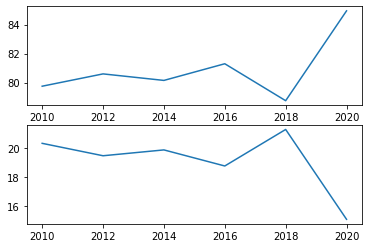

In [28]:
plt.subplot(211)
plt.plot(prevent_pollution_percentage['긍정'])
plt.subplot(212)
plt.plot(prevent_pollution_percentage['부정'])
plt.show()

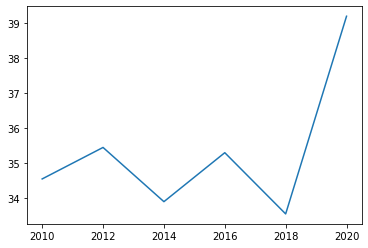

In [29]:
plt.plot(prevent_pollution_percentage['매우 노력함'])
plt.show()

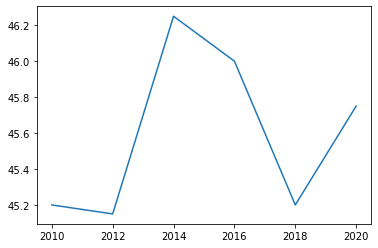

In [30]:
plt.plot(prevent_pollution_percentage['약간 노력함'])
plt.show()

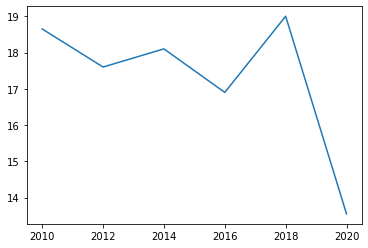

In [31]:
plt.plot(prevent_pollution_percentage['별로 노력하지 않음'])
plt.show()

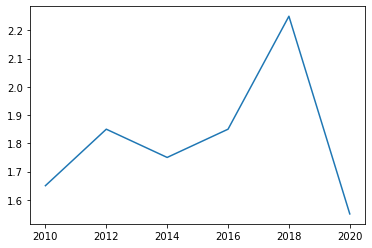

In [32]:
plt.plot(prevent_pollution_percentage['전혀 노력하지 않음'])
plt.show()

In [38]:
prevent_pollution_percentage.loc['2020']

긍정            84.95
부정            15.10
매우 노력함        39.20
약간 노력함        45.75
별로 노력하지 않음    13.55
전혀 노력하지 않음     1.55
Name: 2020, dtype: float64

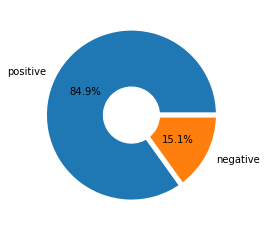

In [48]:
plt.pie(prevent_pollution_percentage.loc['2020', ['긍정', '부정']], labels=['positive', 'negative'], autopct='%.1f%%',wedgeprops={'width': 0.7, 'linewidth': 5, 'edgecolor': 'w'})
plt.show()

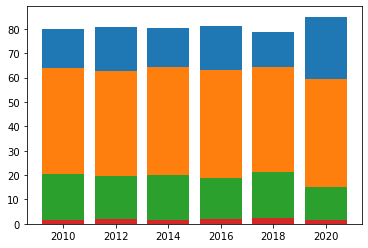

In [57]:
plt.bar(prevent_pollution_percentage.index, prevent_pollution_percentage['매우 노력함'], bottom=prevent_pollution_percentage['약간 노력함'])
plt.bar(prevent_pollution_percentage.index, prevent_pollution_percentage['약간 노력함'], bottom=prevent_pollution_percentage['별로 노력하지 않음'])
plt.bar(prevent_pollution_percentage.index, prevent_pollution_percentage['별로 노력하지 않음'], bottom=prevent_pollution_percentage['전혀 노력하지 않음'])
plt.bar(prevent_pollution_percentage.index, prevent_pollution_percentage['전혀 노력하지 않음'])
plt.show()